# Decisions Tree: Males and Females consume which type of Drugs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [6]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [8]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
con = {"BP":{"LOW":1,"NORMAL":2,"HIGH":3},
      "Cholesterol":{"NORMAL":2, "HIGH":3},
      "Drug": {"drugA":"1","drugB":"2","drugC":"3","drugX":"4","drugY":"5"}}
df = df.replace(con)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,3,3,25.355,5
1,47,M,1,3,13.093,3
2,47,M,1,3,10.114,3
3,28,F,2,3,7.798,4
4,61,F,1,3,18.043,5
...,...,...,...,...,...,...
195,56,F,1,3,11.567,3
196,16,M,1,3,12.006,3
197,52,M,2,3,9.894,4
198,23,M,2,2,14.020,4


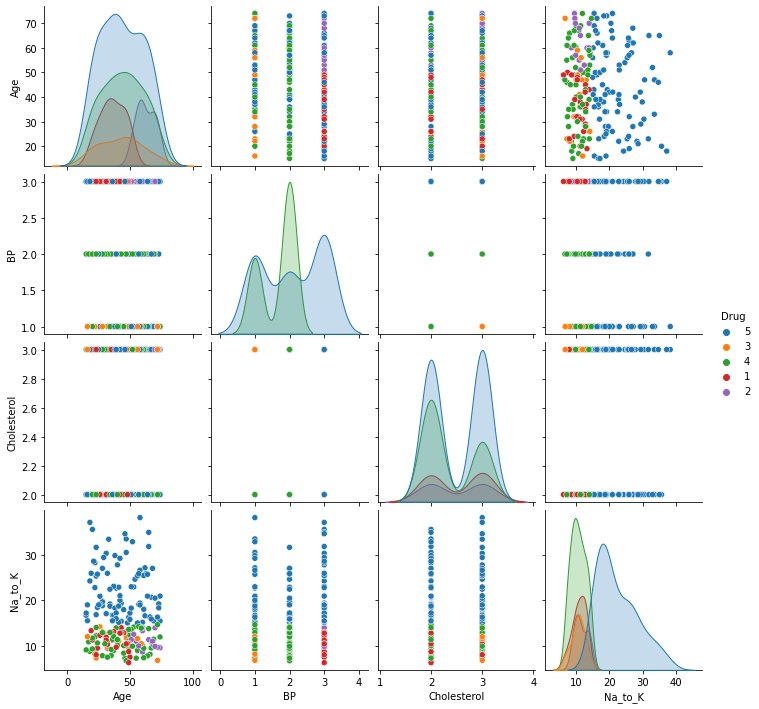

In [10]:
sns.pairplot(data = df, hue='Drug')
plt.show()

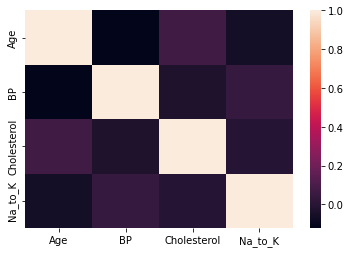

In [11]:
sns.heatmap(df.corr())
plt.savefig("heatmap.png")

In [12]:
X = ['Age','BP','Cholesterol','Na_to_K','Drug']
y = ['M','F']
all_inputs = df[X]
all_classes = df['Sex']

In [13]:
(x_train,x_test,Y_train,Y_test) = train_test_split(all_inputs,all_classes,train_size=0.7,random_state = 1)

In [14]:
print("Training split input:", x_train.shape)
print("Testing split input:", x_test.shape)

Training split input: (140, 5)
Testing split input: (60, 5)


In [15]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()

In [16]:
# fit the training data
dtree.fit(x_train,Y_train)

DecisionTreeClassifier()

In [17]:
# Testing
y_pred = dtree.predict(x_test)
y_pred

array(['M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M',
       'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F',
       'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M',
       'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M'], dtype=object)

In [18]:
print('Classification report: \n', classification_report(Y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           F       0.60      0.48      0.54        31
           M       0.54      0.66      0.59        29

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.56        60
weighted avg       0.57      0.57      0.56        60



In [19]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[15, 16],
       [10, 19]], dtype=int64)

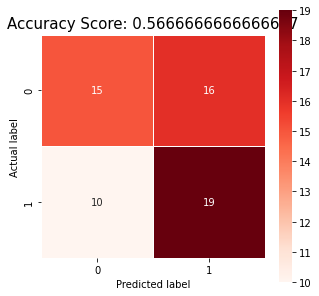

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(x_test,Y_test))
plt.title(all_sample_title, size = 15)
plt.savefig("one.png")

In [21]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

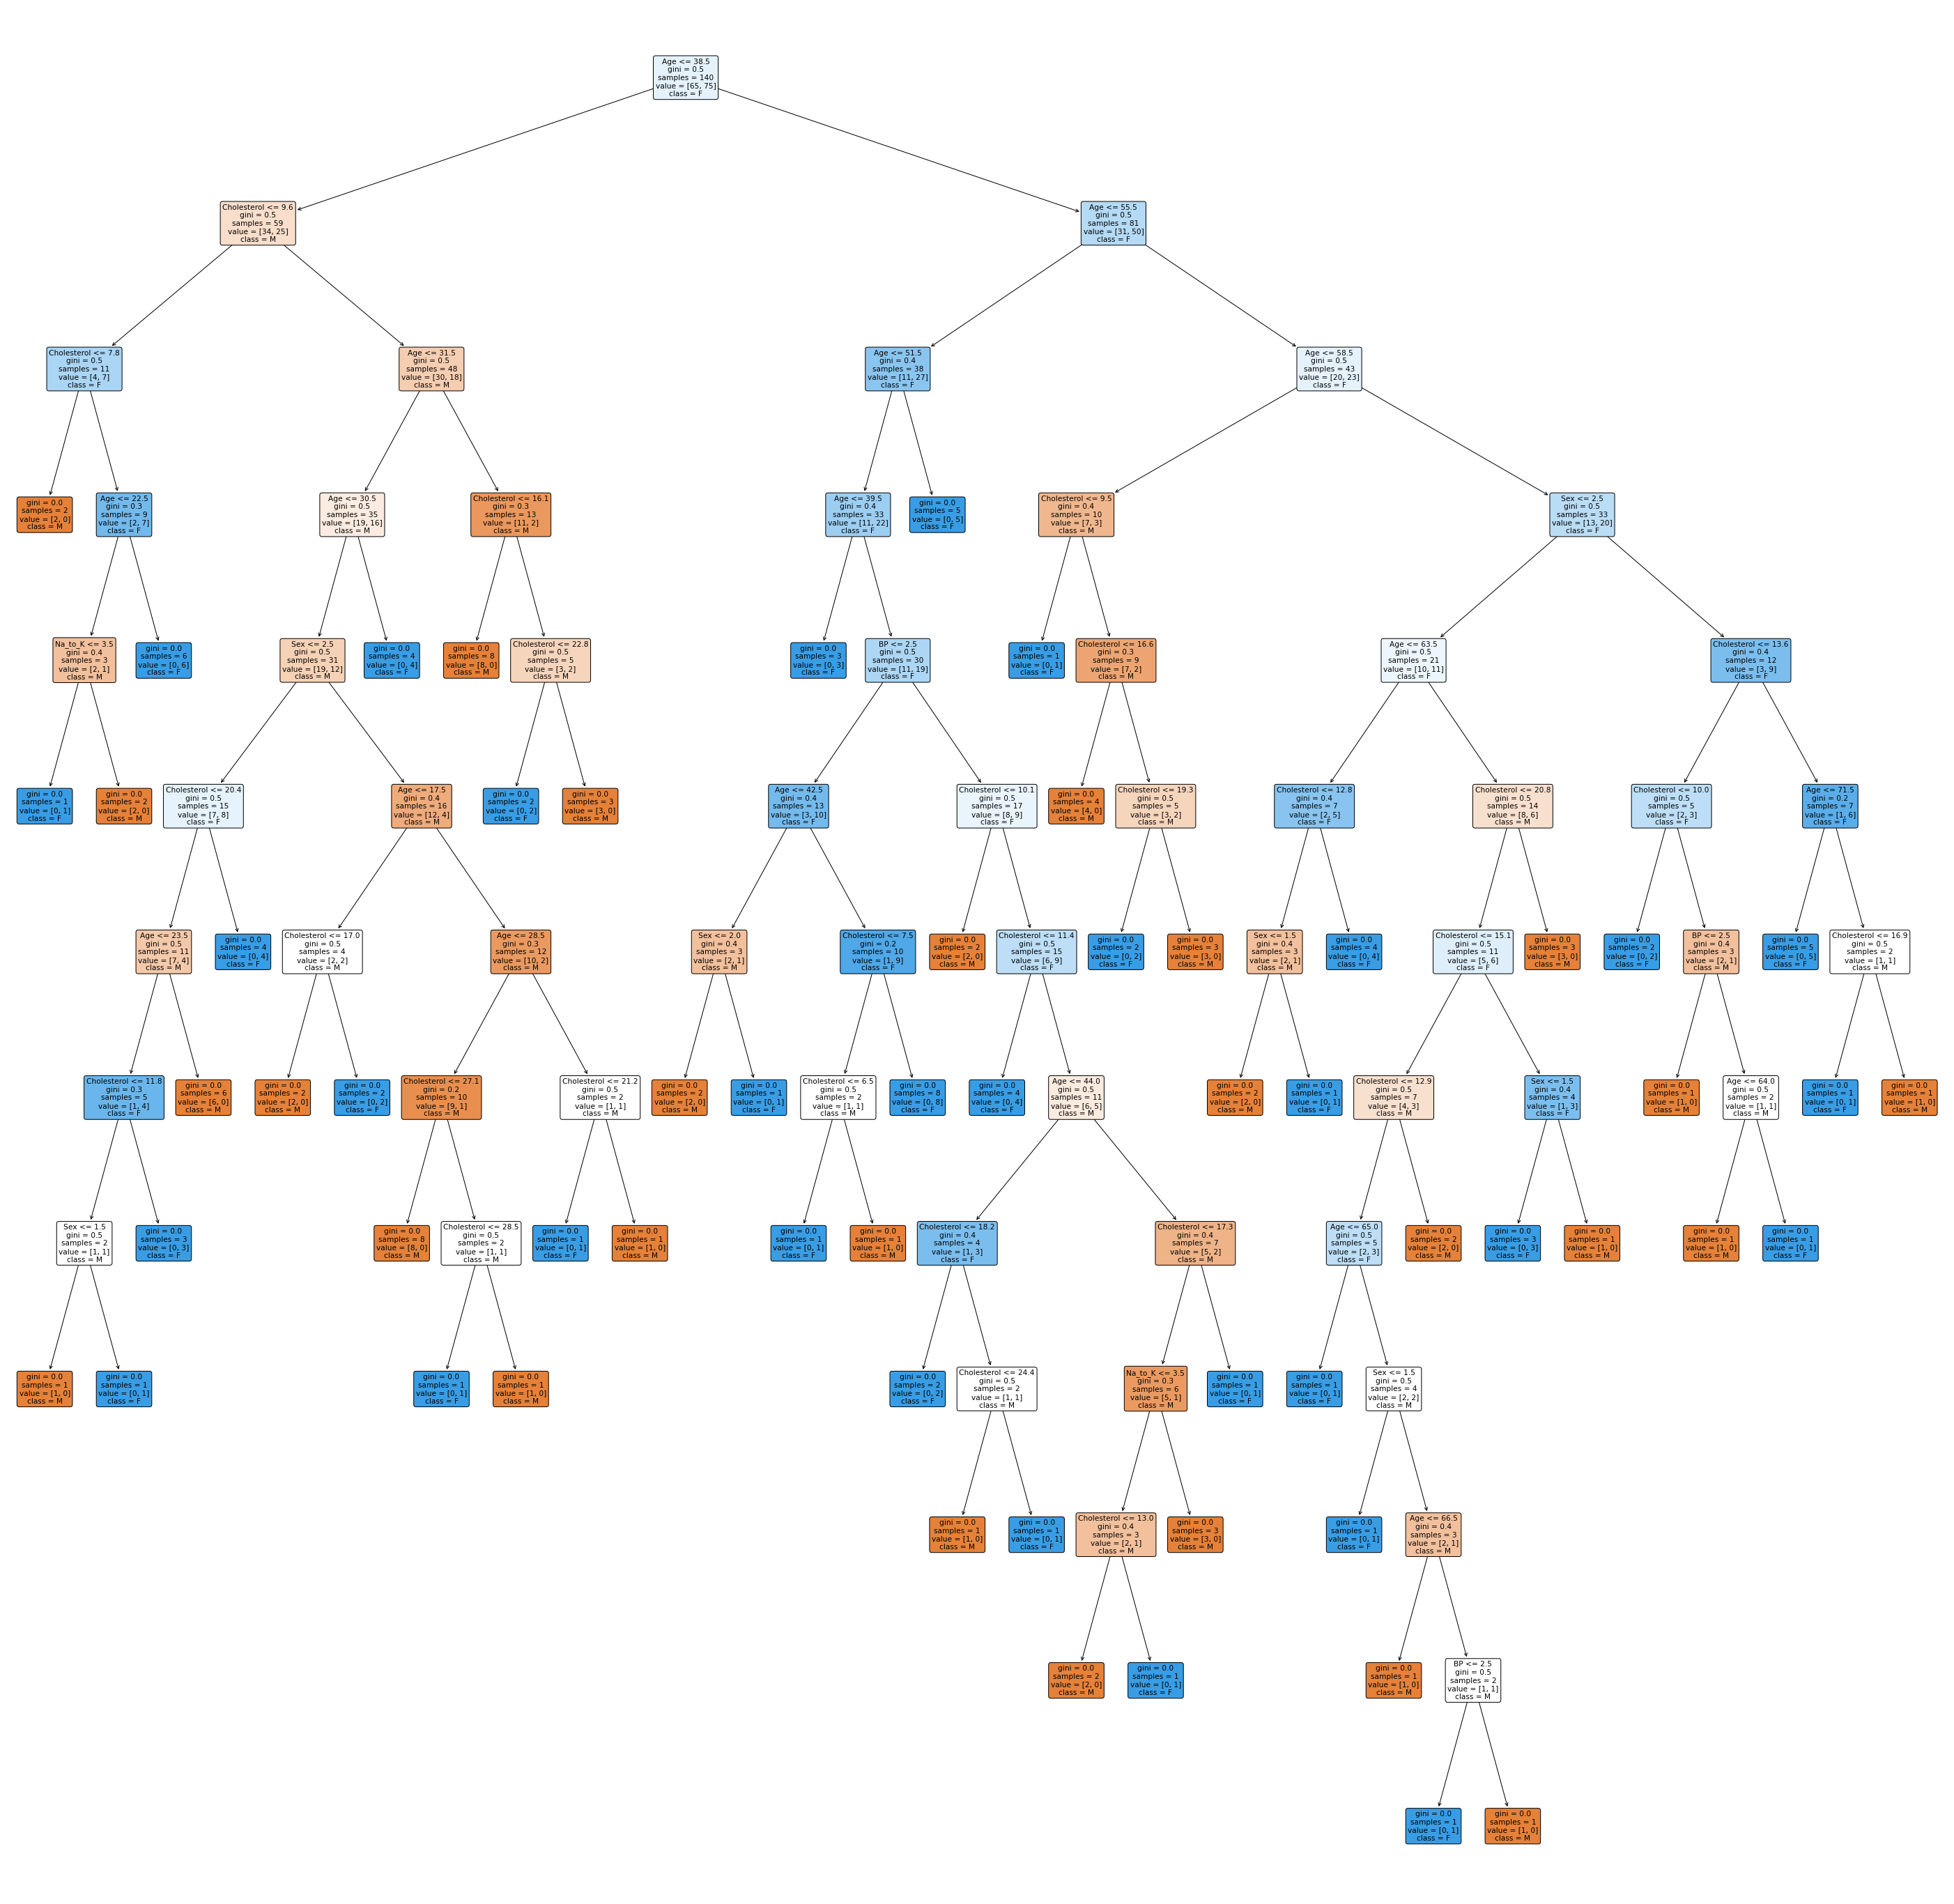

In [22]:
plt.figure(figsize = (50,50))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["M", "F"] , filled = True , precision = 1, rounded = True)

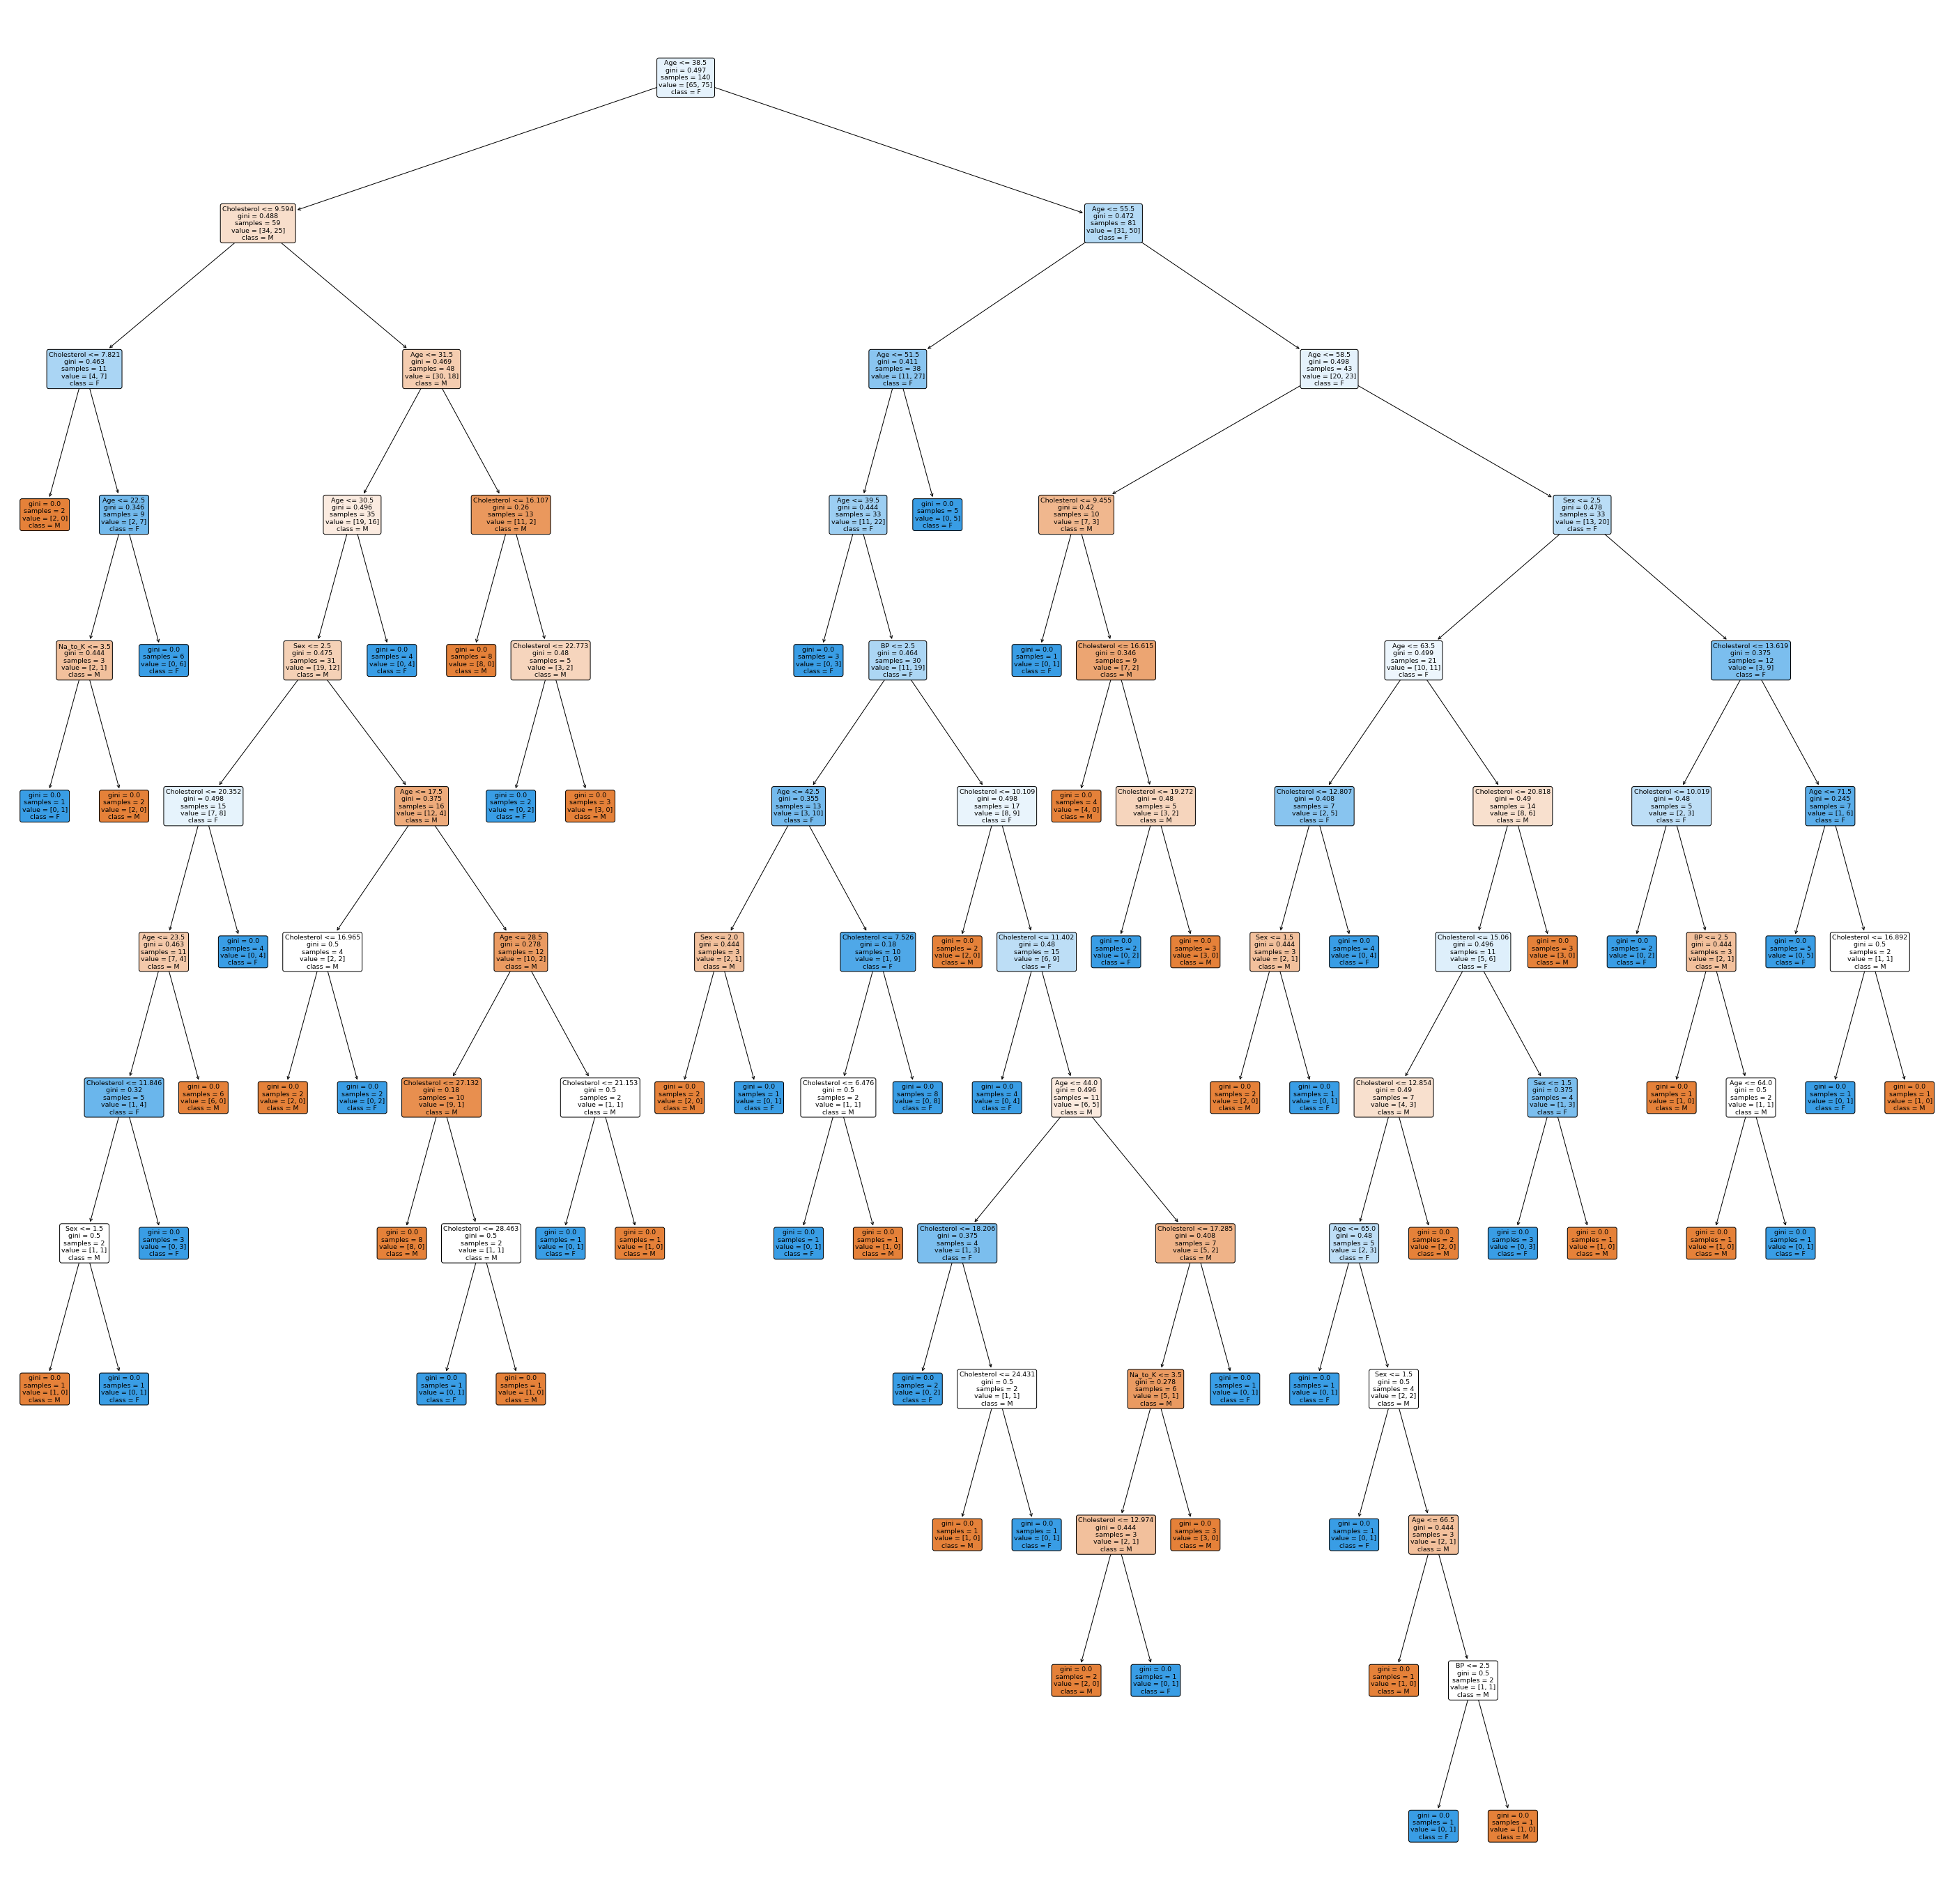

In [23]:
plt.figure(figsize = (50,50))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["M", "F"] , filled = True , precision = 3, rounded = True)

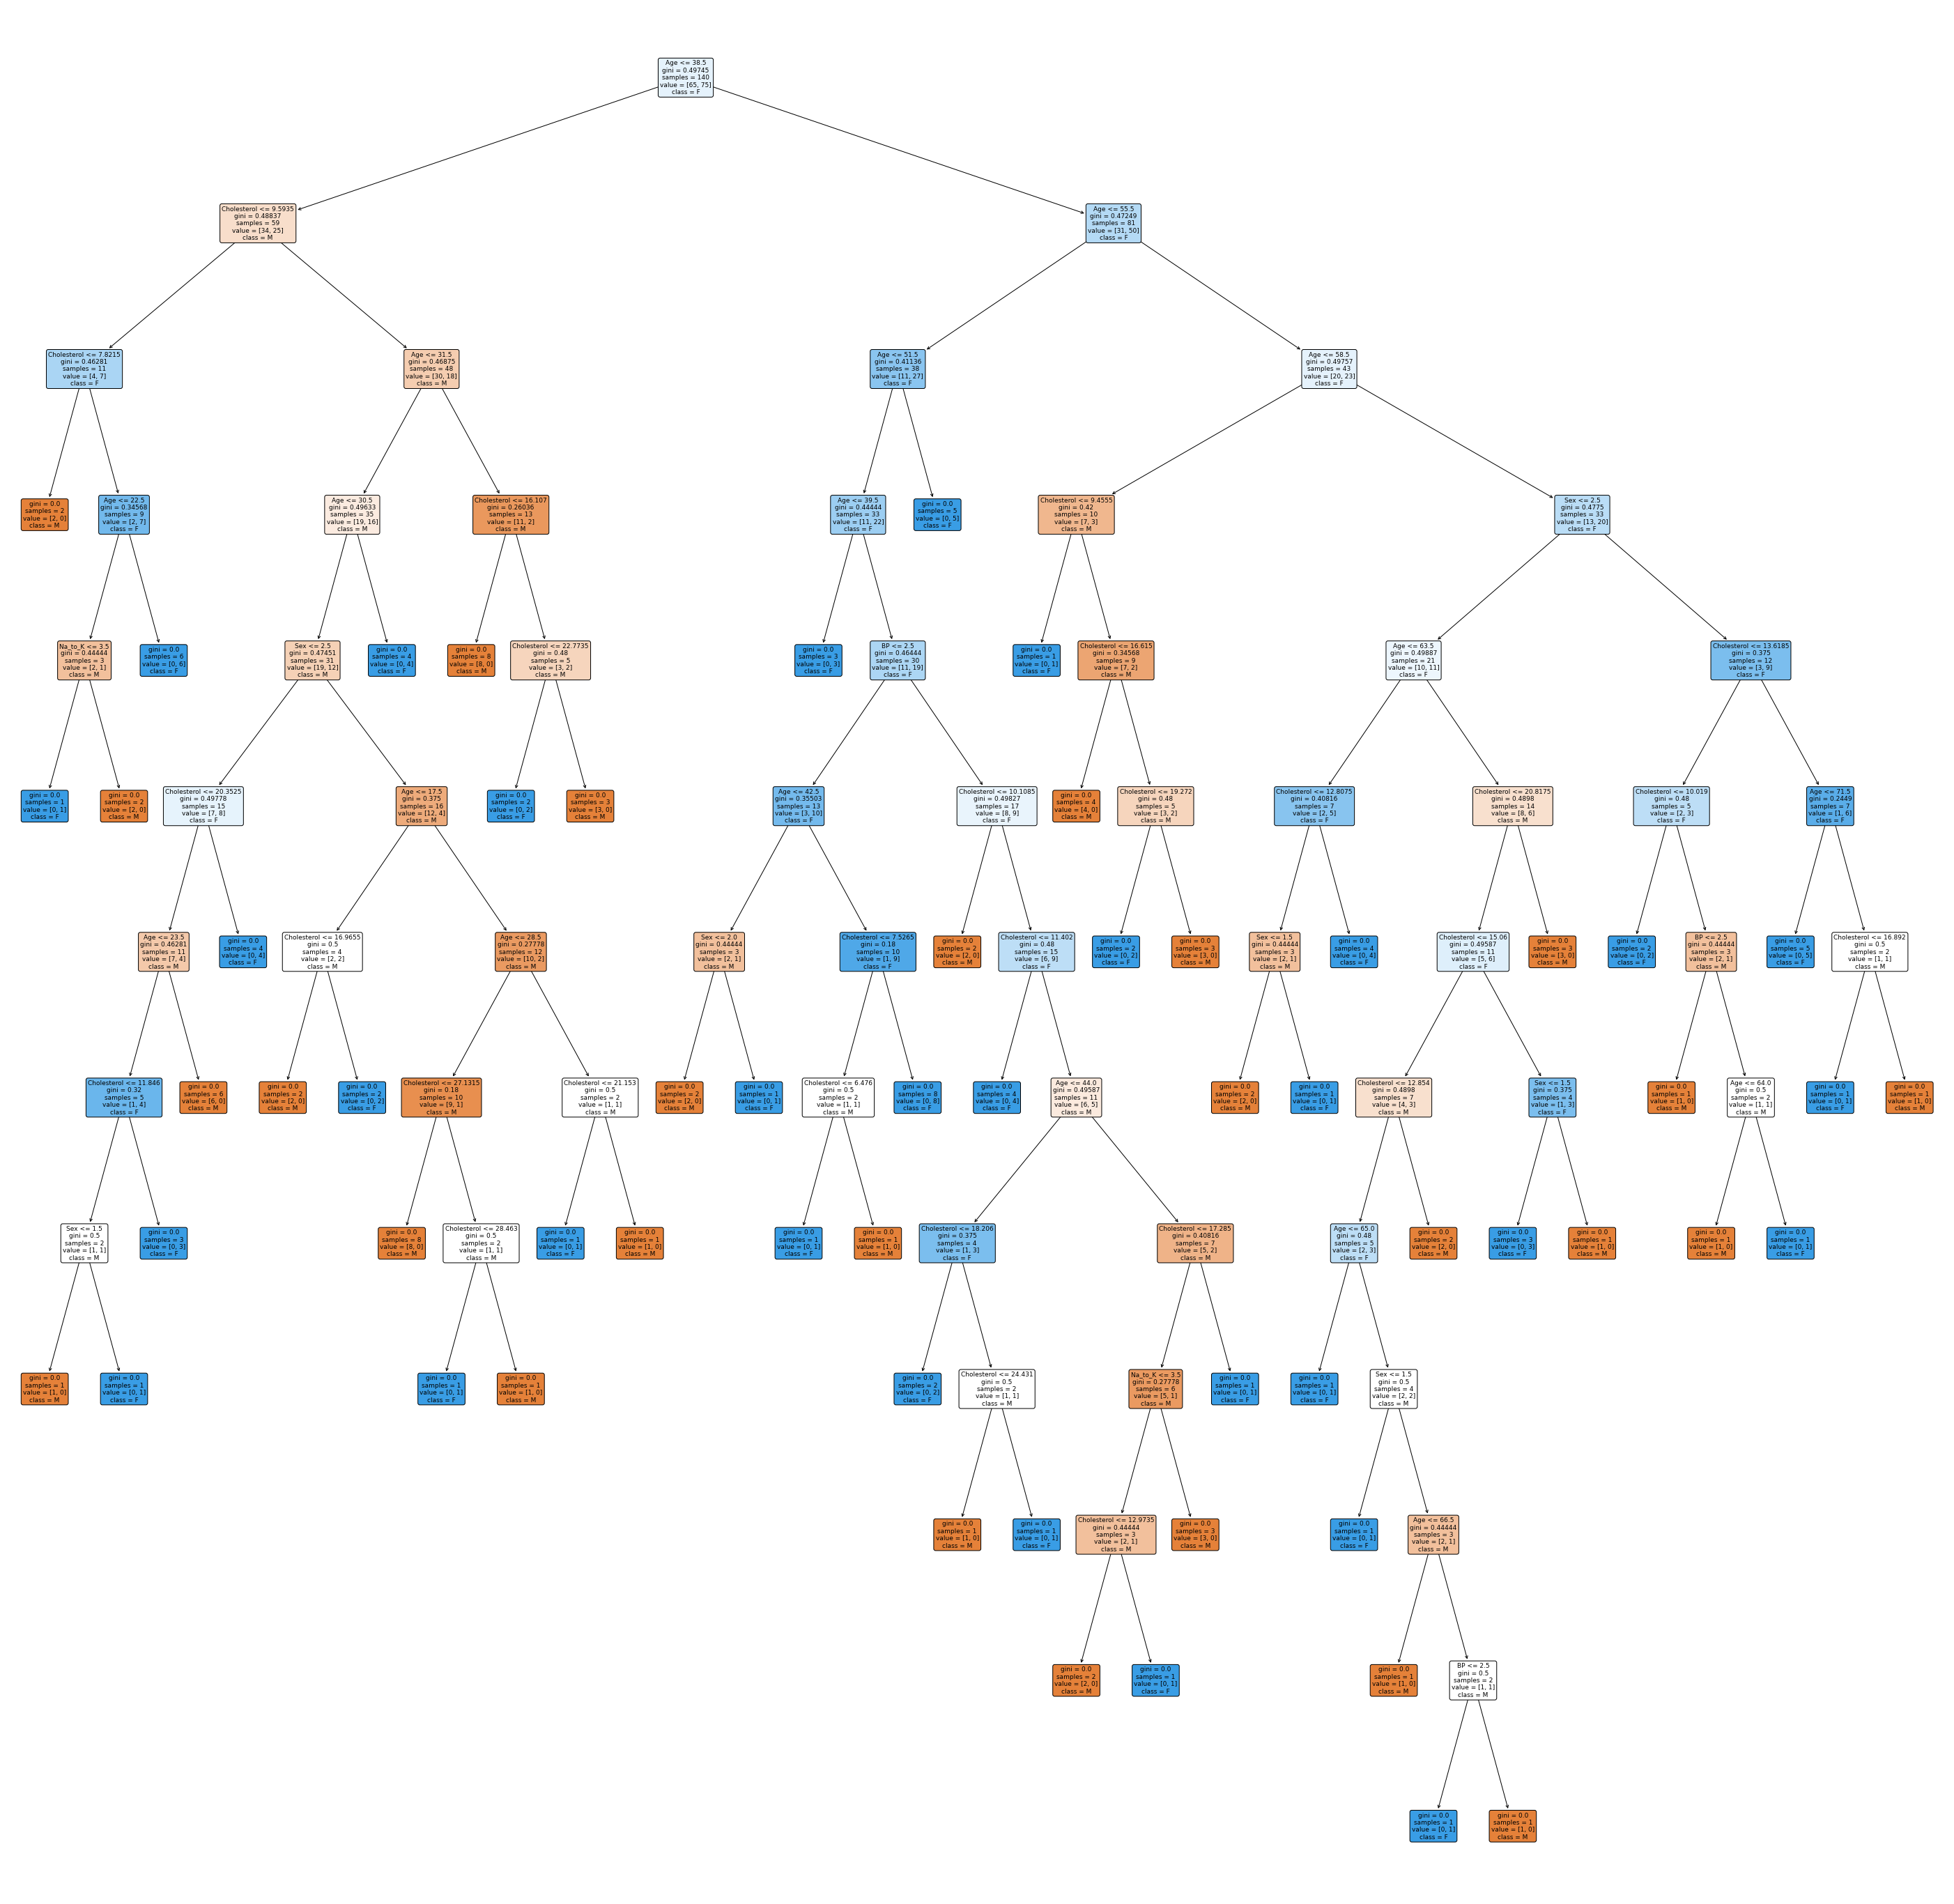

In [24]:
plt.figure(figsize = (50,50))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["M", "F"] , filled = True , precision = 5, rounded = True)